## Section 1

In [1]:
from __future__ import print_function, division
import numpy as np
from Utils2 import generate_bandit_data_for_plot, plot_avg_cumulative_reward

#read result file
dir_name = 'asg2_ddpg_logs_all_share'
# dir_name = 'asg2_ddpg_logs_add_shared_block'
episode_reward_normal_file = 'results/{}/no_sharing/episode_reward_normal.csv'.format(dir_name)
episode_reward_share_top_layer_file = 'results/{}/sharing/episode_reward_share_top_layer.csv'.format(dir_name)

episode_reward_normal = np.genfromtxt(episode_reward_normal_file, delimiter=',')
episode_reward_share_top_layer = np.genfromtxt(episode_reward_share_top_layer_file, delimiter=',')
plot_legend = []
plot_legend.append('Regular DDPG')
plot_legend.append('Shared layer DDPG')

print ("episode_reward_normal.shape: {}".format(episode_reward_normal.shape))
print ("episode_reward_share_top_layer.shape: {}".format(episode_reward_share_top_layer.shape))

episode_reward_normal.shape: (500,)
episode_reward_share_top_layer.shape: (500,)


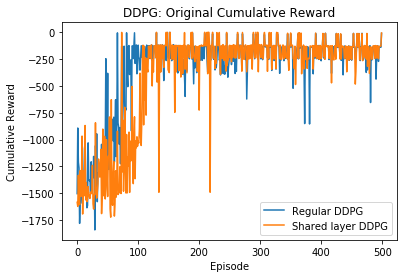

In [2]:
############################################################
#plot results for DDPG and shared layers DDPG

plot_title = "DDPG: Original Cumulative Reward"
plot_avg_cumulative_reward([episode_reward_normal, episode_reward_share_top_layer], \
  plot_legend, plot_title, None, avg_rew=False, use_ax_limit=False)

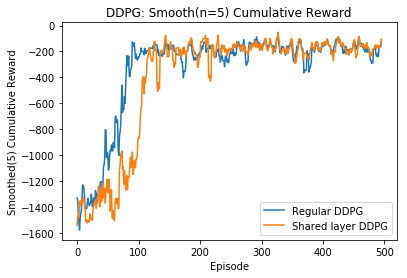

In [7]:
plot_title = "DDPG: Smooth(n=5) Cumulative Reward"
plot_avg_cumulative_reward([episode_reward_normal, episode_reward_share_top_layer], \
  plot_legend, plot_title, None, n=5, avg_rew=False, smooth=True, use_ax_limit=False)

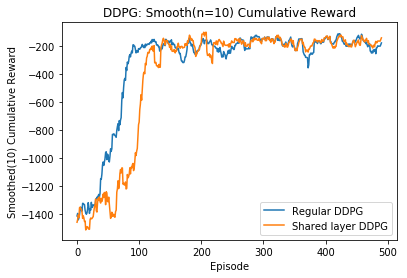

In [6]:
plot_title = "DDPG: Smooth(n=10) Cumulative Reward"
plot_avg_cumulative_reward([episode_reward_normal, episode_reward_share_top_layer], \
  plot_legend, plot_title, None, n=10, avg_rew=False, smooth=True, use_ax_limit=False)

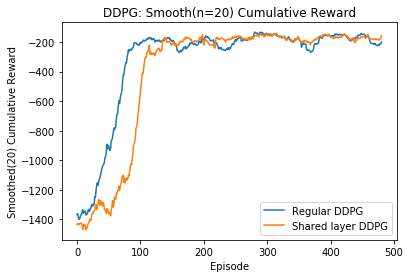

In [5]:
plot_title = "DDPG: Smooth(n=20) Cumulative Reward"
plot_avg_cumulative_reward([episode_reward_normal, episode_reward_share_top_layer], \
  plot_legend, plot_title, None, n=20, avg_rew=False, smooth=True, use_ax_limit=False)

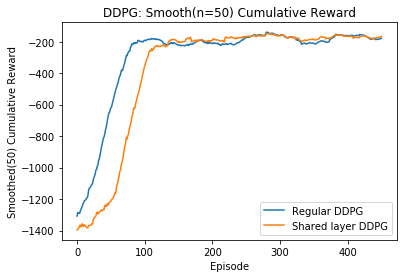

In [8]:
plot_title = "DDPG: Smooth(n=50) Cumulative Reward"
plot_avg_cumulative_reward([episode_reward_normal, episode_reward_share_top_layer], \
  plot_legend, plot_title, None, n=50, avg_rew=False, smooth=True, use_ax_limit=False)

## Section 2

In [3]:
history_episode_reward_normal_file = 'results/{}/no_sharing/history_episode_reward_normal.csv'.format(dir_name)
history_episode_reward_share_top_layer_file = 'results/{}/sharing/history_episode_reward_share_top_layer.csv'.format(dir_name)

history_episode_reward_normal = np.genfromtxt(history_episode_reward_normal_file, delimiter=',')
history_episode_reward_share_top_layer = np.genfromtxt(history_episode_reward_share_top_layer_file, delimiter=',')
history_plot_legend = []
history_plot_legend.append('Regular DDPG')
history_plot_legend.append('Shared layer DDPG')

print ("history_episode_reward_normal.shape: {}".format(history_episode_reward_normal.shape))
print ("history_episode_reward_share_top_layer.shape: {}".format(history_episode_reward_share_top_layer.shape))

history_episode_reward_normal.shape: (500,)
history_episode_reward_share_top_layer.shape: (500,)


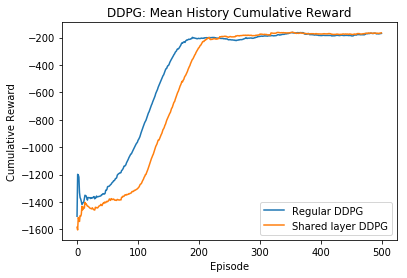

In [4]:
############################################################
#plot results for DDPG and shared layers DDPG

history_plot_title = "DDPG: Mean History Cumulative Reward"
plot_avg_cumulative_reward([history_episode_reward_normal, history_episode_reward_share_top_layer], \
  history_plot_legend, history_plot_title, None, avg_rew=False, use_ax_limit=False)

The `Section 1` shows the graph of actual rewards in each episode of 1 run of the DDPG for 500 episodes (50 epochs). The `Section 2` shows the graph of mean of episode_reward_history (a queue history of upto 100 past episodes) of 1 run of the DDPG algorithm for 500 epsiodes (50 epochs).

The blue line corresponds to using regular DDPG architecture and the orange line corresponds to using shared first layer between the actor and the critic network. We see that the DDPG with shared layers in actor and critic performs worse as it takes longer to converge to the optimal solution than regular DDPG. I think the reason for this is that the Critic network takes in input as $[observation, actions]$ which is different from the input of the actor network with inputs: $[observation]$ and the output of the networks is different as well. The sharing of the first layer doesn't get affected on the forward-propagation of the network, but when computing the backpropagation of the actor and the critic network, the critic network updates are different than that of the actor network. Thus, when backpropagating through the shared layers, the actor and critic provide with different update values and this diverges the shared layers. However, over-time the updates are able to stabalize and I think the output of the first shared layer (after convergence) represents the state encoding which is common to both actor and critic and thus could be useful for a more stable convergence. We don't fully see this in the graph above. But we can see that the orange line is above the blue line most of the time; showing that the shared layer actor/critic DDPG has converged better to an optimal solution than regular DDPG. In section 1 above, I also post the graph with moving average of $n=5,10,20,50$ (based on episode reward) and we can clearly see that the shared DDPG has a slower learning curve (cumulative reward) initially; but achieves a better convergence (faster to achieve stable cumulative reward). We saw in assignment 1, that DQN was said to have converged when the average cumulative reward (over last 100 episodes) was $>200$ (maximum cumulative reward available in an episode). As we can see from graph `DDPG: Smooth (n=5,10,20) Cumulative reward`, the shared DDPG will be converging faster with such a convergence condition. Whereas, the regular DDPG, will take longer to converge as the blue curve is not stable at the value of maximum reward (-200).

## Other Notes
Professor mentioned that the target/param_noise actor and target/param_noise critic shouldn't share the first layer, however this produces really bad results as the following curve shows. The graph shows that the shared layer curve never converges because new optimizers with constraints might need to be implemented.
![alt text](results/asg2_ddpg_logs_explicit_reuse_arg/ddpg_smooth_n50_part2.png "DDPG: Avg Cumulative reward")
I think the issue is that the loss of the actor and the critic are being passed seperately through backpropagation and they should be summed up (or some other technique to combine losses). However, the assignment didn't ask for a shared optimizer for the shared layers and didn't provide a stratergy. So I have left it with shared layers and the backpropagation comes in from both the actor and the critic network. I don't know if this is ideal or if we should instead add a new shared block after the input of observations and then compute the losses for it differently and seperately optimize it.